In [130]:
import os
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve

In [131]:
# collect
dataset_path = 'D:\manualCDmanagement\codes\Projects\VMs\skl algorithms\Logistic Regression/00_datasets\HR'
file_name = 'HR_dataset.csv'
path_file = os.path.join(dataset_path, file_name)
df = pd.read_csv(path_file)
df.head()

not_droped = ['Department', 'salary']

for column in df.columns:
    if column in not_droped:
        df[column], _ = pd.factorize(df[column])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [132]:
#split
X = df.drop('left', axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
# balance
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
y_train_resampled.value_counts()

left
0    9134
1    2865
Name: count, dtype: int64


left
0    9134
1    9134
Name: count, dtype: int64

In [135]:
import numpy as np
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_scaled_resampled, y_train_resampled)

y_prob_pos = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_pos)
j_scores = tpr-fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
manual_threshold = 0.7
y_pred_optimal = (y_prob_pos >= manual_threshold).astype(int)

In [146]:
# evalutaion
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_optimal))

print("Original y_train value counts:")
print(y_train.value_counts())

print("Resampled y_train value counts:")
print(y_train_resampled.value_counts())

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2294
           1       0.57      0.51      0.54       706

    accuracy                           0.79      3000
   macro avg       0.71      0.70      0.70      3000
weighted avg       0.79      0.79      0.79      3000

Original y_train value counts:
left
0    9134
1    2865
Name: count, dtype: int64
Resampled y_train value counts:
left
0    9134
1    9134
Name: count, dtype: int64


Text(0.5, 1.0, 'cofusion matrix')

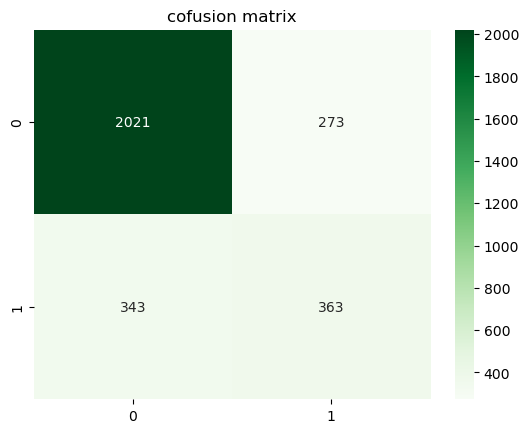

In [159]:
conf = confusion_matrix(y_test, y_pred_optimal)

import seaborn as sns
sns.heatmap(conf, annot=True, fmt='d', cmap='Greens')
plt.title('cofusion matrix')

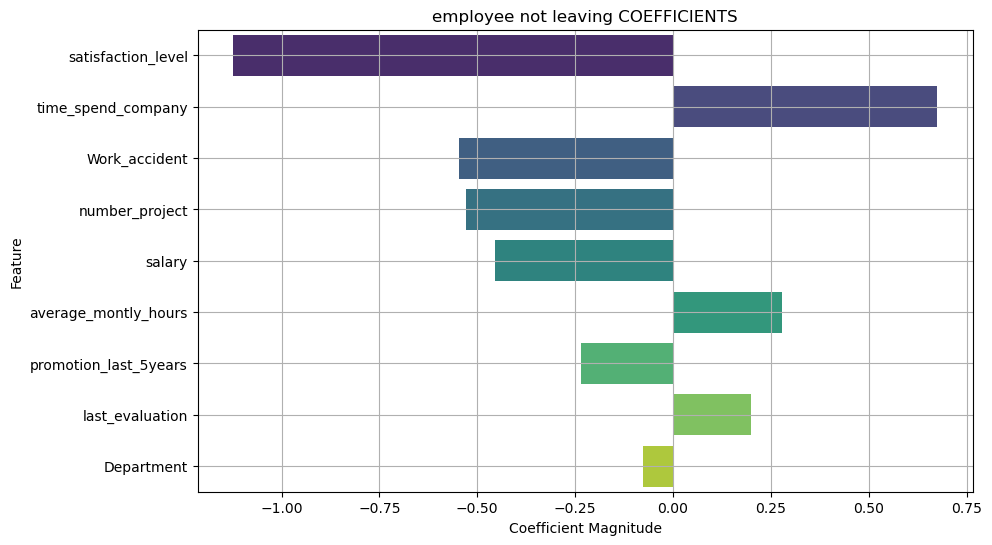

In [161]:
import matplotlib.pyplot as plt
coefficients = model.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('employee not leaving COEFFICIENTS')
plt.grid(True)